In [2]:
#Import packages
#---------------------------------------
import sys
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pygtftk as gtftk
import pyranges as pr

#Import your modules
#---------------------------------------
import te_rna_f as te
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

'3.9.12 (main, Apr  5 2022, 06:56:58) \n[GCC 7.5.0]'

# Load metadata




In [179]:
# For non-TSO analysis, Male, 10 timepoints (Glu + Gaba)
meta = pd.read_csv('/datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/PEC_RNAmeta.csv')


In [180]:
male_GABA = meta[np.array(meta['sex'] == 'Male') & np.array(meta['Cell Type'] == 'GABA')]
male_GLU = meta[np.array(meta['sex'] == 'Male') & np.array(meta['Cell Type'] == 'GLU')]


In [181]:
zipped_pairs = zip(male_GLU['AGEYEARS'], male_GLU['Sample ID'])
z = [x for x in sorted(zipped_pairs)]
ind = z[::3][2:]
names = np.asarray(ind)[:,1]
ind, names

([(4, '6032'),
  (11, '6285'),
  (15, '1823'),
  (17, '5643'),
  (30, 'Hct16HECA028'),
  (35, '1277'),
  (39, '1241'),
  (58, '1848'),
  (62, '5326'),
  (77, '5744')],
 array(['6032', '6285', '1823', '5643', 'Hct16HECA028', '1277', '1241',
        '1848', '5326', '5744'], dtype='<U21'))

In [182]:
#GLU DATA
male_GLU_df = male_GLU.iloc[[np.where(names[i] == male_GLU['Sample ID'])[0][0] for i in range(len(names))]]
male_GLU_df

,Sample ID,Cell Type,RIN,Bulk tissue RNA RIN#,RNAseq Library Prep Date Date,batch,Brain Bank,DISORDER,CDEATHOFF,AGEYEARS,AGEDAYS,sex,race,Brain PH,PMI Hours,sample,period
89,6032,GLU,6.5,7,1/27/2022,10,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Head & Neck injuries,4,51.0,Male,White,6.34,25.0,6032-GLU,earlychildhood
91,6285,GLU,3.4,5.5,2/16/2022,14,University of Maryland Brain and Tissue Bank(U...,NaN,Traumatic arrest/blunt trauma (ped. vs vehicle),11,25.0,Male,White,7.02,8.0,6285-GLU,latechildhood
16,1823,GLU,6.1,7,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Multiple Injuries,15,128.0,Male,White,5.55,18.0,1823-GLU,adolescence
71,5643,GLU,5.5,7.8,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Cardiac Arrhythmia due to conduction system,17,123.0,Male,Black or African-American,ND,14.0,5643-GLU,adolescence
109,Hct16HECA028,GLU,4.2,8.2,2/16/2022,14,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Hypertensive and Atherosclerotic Cardiovascula...,30,279.0,Male,Black or African-American,6.58,20.8,Hct16HECA028-GLU,adulthood
9,1277,GLU,5.9,8.9,3/10/2022,17,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,ASCVD (Arteriosclerotic Cardiovascular Disease),35,27.0,Male,White,5.47,20.0,1277-GLU,adulthood
93,1241,GLU,4.4,7.9,1/27/2022,10,MSSM Brain Bank,Unaffected Control,manner of death: natural,39,NaN,Male,White,7,20.6,1241-GLU,adulthood
18,1848,GLU,5.2,7.8,11/29/2021,6,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,HASCVD,58,49.0,Male,Black or African-American,6.02,9.0,1848-GLU,lateadulthood
55,5326,GLU,5.1,7.3,2/9/2022,13,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Torso Injuries,62,107.0,Male,White,6.02,6.0,5326-GLU,lateadulthood
73,5744,GLU,3.4,9.5,3/25/2022,20,Human Brain and Spinal Fluid Resource Center (...,Unaffected Control,Undetermined,77,NaN,Male,White,6.6,22.0,5744-GLU,lateadulthood


In [99]:
#GABA DATA
male_GABA_df = male_GABA.iloc[[np.where(names[i] == male_GABA['Sample ID'])[0][0] for i in range(len(names))]]
male_GABA_df

,Sample ID,Cell Type,RIN,Bulk tissue RNA RIN#,RNAseq Library Prep Date Date,batch,Brain Bank,DISORDER,CDEATHOFF,AGEYEARS,AGEDAYS,sex,race,Brain PH,PMI Hours,sample,period
88,6032,GABA,6.6,7,1/27/2022,10,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Head & Neck injuries,4,51.0,Male,White,6.34,25.0,6032-GABA,earlychildhood
90,6285,GABA,4.4,5.5,2/16/2022,14,University of Maryland Brain and Tissue Bank(U...,NaN,Traumatic arrest/blunt trauma (ped. vs vehicle),11,25.0,Male,White,7.02,8.0,6285-GABA,latechildhood
15,1823,GABA,5.8,7,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Multiple Injuries,15,128.0,Male,White,5.55,18.0,1823-GABA,adolescence
70,5643,GABA,5.4,7.8,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Cardiac Arrhythmia due to conduction system,17,123.0,Male,Black or African-American,ND,14.0,5643-GABA,adolescence
108,Hct16HECA028,GABA,4.2,8.2,2/16/2022,14,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Hypertensive and Atherosclerotic Cardiovascula...,30,279.0,Male,Black or African-American,6.58,20.8,Hct16HECA028-GABA,adulthood
8,1277,GABA,5.6,8.9,3/10/2022,17,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,ASCVD (Arteriosclerotic Cardiovascular Disease),35,27.0,Male,White,5.47,20.0,1277-GABA,adulthood
92,1241,GABA,4.8,7.9,1/27/2022,10,MSSM Brain Bank,Unaffected Control,manner of death: natural,39,NaN,Male,White,7,20.6,1241-GABA,adulthood
17,1848,GABA,5.2,7.8,11/29/2021,6,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,HASCVD,58,49.0,Male,Black or African-American,6.02,9.0,1848-GABA,lateadulthood
54,5326,GABA,4.3,7.3,2/9/2022,13,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Torso Injuries,62,107.0,Male,White,6.02,6.0,5326-GABA,lateadulthood
72,5744,GABA,3.4,9.5,3/25/2022,20,Human Brain and Spinal Fluid Resource Center (...,Unaffected Control,Undetermined,77,NaN,Male,White,6.6,22.0,5744-GABA,lateadulthood


# Filter for TSO



### Calculate TSS dispersion after TSO filtering


In [3]:
tss = pr.read_bed('/cndd3/dburrows/DATA/te/gtf/annotations/refTSS/refTSS_v3.3_human_coordinate.hg38.bed')

In [4]:
tss

,Chromosome,Start,End,Name,Score,Strand,ThickStart,ThickEnd,ItemRGB
0,chr1,36521,36538,hg_234905.1,1,+,36529,36530,"255,255,0"
1,chr1,207042,207057,hg_233845.1,1,+,207049,207050,"255,255,0"
2,chr1,629191,629220,hg_1.1,1,+,629205,629206,"255,255,0"
3,chr1,629259,629269,hg_2.1,1,+,629264,629265,"255,255,0"
4,chr1,629635,629651,hg_235997.1,1,+,629643,629644,"255,255,0"
...,...,...,...,...,...,...,...,...,...
224689,chrY,24776485,24776499,hg_244143.1,1,-,24776492,24776493,"255,255,0"
224690,chrY,24813392,24813393,hg_244144.1,1,-,24813392,24813393,"255,255,0"
224691,chrY,25051999,25052000,hg_244147.1,1,-,25051999,25052000,"255,255,0"
224692,chrY,26671129,26671136,hg_201298.1,1,-,26671132,26671133,"255,255,0"


In [124]:
import glob
glob.glob('/cndd3/dburrows/DATA/te/rna/aligned.subset.TSO-filt/5326-GLU' + '/*Tra*.bam')[0]

'/cndd3/dburrows/DATA/te/rna/aligned.subset.TSO-filt/5326-GLU/Aligned.toTranscriptome.out.bam'

In [114]:
glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*trim.*.gz')

['/cndd3/dburrows/DATA/te/rna/fastq.subset/1823-GABA-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1241-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5744-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1848-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/6285-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1277-GABA-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1848-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/6285-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/6032-GLU-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5643-GLU-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1823-GLU-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5326-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5326-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5744-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subse

### Calculate positions of TSO

In [36]:
import glob
R1_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R1*txt')
R2_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R1*txt')
R1_l, R2_l

(['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R1-trim-pos.txt'],
 ['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R1-trim-pos.txt'])

In [37]:
def read_cat(path):
    with open(path) as f:
        prac = f.read().splitlines()
    v = np.asarray(str.split(prac[0])).astype(int)
    return(v)


In [38]:
R1_cat, R2_cat = [],[]
for i in range(len(R2_l)):
    R1_cat = np.hstack((R1_cat, read_cat(R1_l[i])))
    R2_cat = np.hstack((R2_cat, read_cat(R2_l[i])))


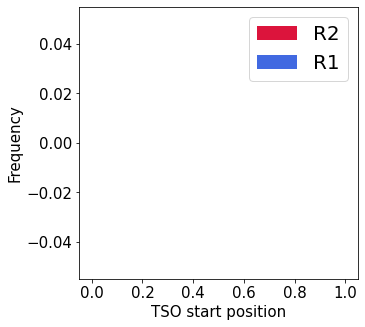

In [103]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(R2_cat, bins = 50, color='crimson', label='R2')
plt.hist(R1_cat, bins = 50, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

In [49]:
import glob
R1_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R1*txt')
R2_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R2*txt')
R1_l, R2_l

(['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R1-trim-pos.txt'],
 ['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R2-trim-pos.txt'])

In [40]:
def read_cat(path):
    with open(path) as f:
        prac = f.read().splitlines()
    v = np.asarray(prac).astype(int)
    return(v)


In [50]:
R1_cat, R2_cat = [],[]
for i in range(len(R2_l)):
    R1_cat = np.hstack((R1_cat, read_cat(R1_l[i])))
    R2_cat = np.hstack((R2_cat, read_cat(R2_l[i])))


In [55]:
R1_cat, R2_cat

(array([100.,  11.,  38., ..., 100.,   0.,  47.]),
 array([ 75., 100., 100., ...,  78., 100., 100.]))

In [48]:
np.max(R1_cat)

100.0

In [60]:
R1_filt = 100 - R1_cat[R1_cat < R2_cat]
R2_filt = 100 - R2_cat[R2_cat < R1_cat]


In [56]:
R1_filt = 100 - R1_cat
R2_filt = 100 - R2_cat


In [59]:
R1_filt

array([  0.,  89.,  62., ...,   0., 100.,  53.])

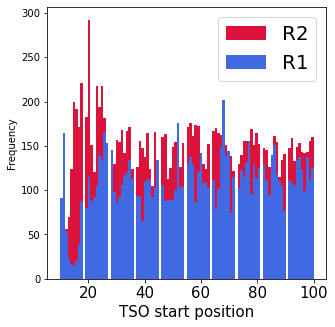

In [61]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(R2_filt, bins = 100, color='crimson', label='R2')
plt.hist(R1_filt, bins = 100, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(prop={'size': 20})
#plt.savefig(s_fig + '/TSO_pos_cutadapt.svg', transparent=True)
plt.show()

In [ ]:
R1_filt = 100 - R1_cat[R1_cat < 100]
R2_filt = 100 - R2_cat[R2_cat < 100]

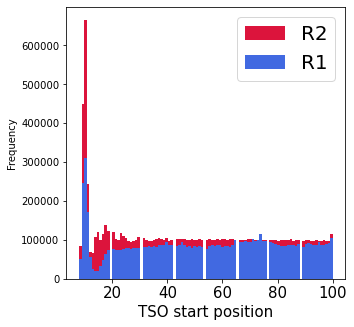

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(R2_filt, bins = 100, color='crimson', label='R2')
plt.hist(R1_filt, bins = 100, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(prop={'size': 20})
plt.savefig(s_fig + '/TSO_pos_cutadapt.svg', transparent=True)
plt.show()

In [ ]:
R1_cat, R2_cat = [],[]
for i in range(len(R2_l)):
    R1_cat = np.hstack((R1_cat, read_cat(R1_l[i])))
    R2_cat = np.hstack((R2_cat, read_cat(R2_l[i])))


### Calculate proportions of TSO

In [ ]:
# For non-TSO analysis, Male, 10 timepoints (Glu + Gaba)
df = pd.read_csv('/cndd3/dburrows/DATA/te/rna/fastq.subset.TSO/TSO_counts.csv')


In [ ]:
df

,ID,counts,total reads,normalised counts
0,6032-GLU,5393484,461783892,0
1,6032-GABA,4086032,342269132,0
2,6285-GLU,6126792,502425144,0
3,6285-GABA,7227780,613945456,0
4,1823-GLU,0,302078012,0
5,1823-GABA,4499944,406219576,0
6,5643-GLU,3905756,344266196,0
7,5643-GABA,5161144,445277700,0
8,HCK16HECA028-GLU,4857624,397996640,0
9,HCK16HECA028-GABA,4850800,407171776,0


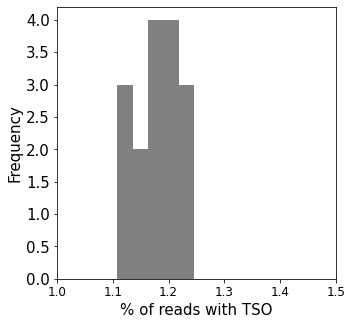

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
data = np.asarray(df['counts']/df[' total reads']) 
data[data>0]
plt.hist(data[data>0]*100, bins=5, color='grey')
plt.xlabel('% of reads with TSO', fontsize=15)
plt.xlim(1,1.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.savefig(s_fig + '/TSO_freq.svg', transparent=True)
plt.show()



In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
plt.hist(R2_cat, bins = 50, color='crimson', label='R2')
plt.hist(R1_cat, bins = 50, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

# Filter by 5' alignment

### Generate full-length TE bed file

In [2]:
# Load in data

#rmsk file
rmsk = pr.read_gtf('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/rmsk.hg38.gtf', as_df=True)

In [39]:
rmsk

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
0,chr1,hg38_rmsk,exon,100000000,100000637,11325,-,.,L1M2,L1M2_dup229,L1,LINE
1,chr1,hg38_rmsk,exon,10000001,10000239,1760,+,.,AluSx3,AluSx3_dup157,Alu,SINE
2,chr1,hg38_rmsk,exon,100000743,100002612,11325,-,.,L1M2,L1M2_dup230,L1,LINE
3,chr1,hg38_rmsk,exon,10000250,10000566,2225,+,.,AluSx,AluSx_dup700,Alu,SINE
4,chr1,hg38_rmsk,exon,100002612,100002913,1799,-,.,AluJr,AluJr_dup3513,Alu,SINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4693506,chrY,hg38_rmsk,exon,9998087,9998438,1154,-,.,MLT1B,MLT1B_dup11187,ERVL-MaLR,LTR
4693507,chrY,hg38_rmsk,exon,9999718,9999778,228,-,.,MIR3,MIR3_dup51650,MIR,SINE
4693508,KI270740.1,hg38_rmsk,exon,228,540,2240,-,.,AluY,AluY_dup110742,Alu,SINE
4693509,KI270740.1,hg38_rmsk,exon,624,867,1433,-,.,L1PA7,L1PA7_dup13354,L1,LINE


In [3]:
#FILTER FOR LINEs
line = rmsk[rmsk['class_id'] == 'LINE']
print('Line families = ' + str(line['family_id'].unique()))
print('Here we only look at L1 and L2 families')
l1 = line[line['family_id']=='L1']
l2 = line[line['family_id']=='L2']
print('Total L1 insertions in reference n = ' + str(len(l1)))
print('Total L2 insertions in reference n = ' + str(len(l2)))

#Remove truncated insertions by length
l1_co = 5500  #define minimum length for l1 insertions
l2_co = 2500 #define minimum length for l2 insertions

l1_full = l1[l1['End']-l1['Start'] > l1_co]
l2_full = l2[l2['End']-l2['Start'] > l2_co]

assert np.max(l1_full['End']-l1_full['Start']) > l1_co,  'L1 elements not correctly filtered'
assert np.max(l2_full['End']-l2_full['Start']) > l2_co,  'L2 elements not correctly filtered'
print ('Retained L1 insertions = ' + str(len(l1_full)) + ' ,  Truncated L1 insertions removed = ' + str(len(l1)-len(l1_full)))
print ('Retained L2 insertions = ' + str(len(l2_full)) + ' ,  Truncated L2 insertions removed = ' + str(len(l2)-len(l2_full))) 

Line families = ['L1' 'L2' 'CR1' 'RTE-Bo.B' 'RTE-X' 'Penelope' 'Dong-R4' 'RTE-BovB']
Here we only look at L1 and L2 families
Total L1 insertions in reference n = 1001410
Total L2 insertions in reference n = 474561
Retained L1 insertions = 8991 ,  Truncated L1 insertions removed = 992419
Retained L2 insertions = 46 ,  Truncated L2 insertions removed = 474515


In [7]:
#FILTER FOR SINEs
sine = rmsk[rmsk['class_id'] == 'SINE']
print('Sine families = ' + str(sine['family_id'].unique()))
print('Here we only look at Alu and MIR families')
alu = sine[sine['family_id']=='Alu']
mir = sine[sine['family_id']=='MIR']
print('Total Alu insertions in reference n = ' + str(len(alu)))
print('Total MIR insertions in reference n = ' + str(len(mir)))

#Remove truncated insertions by length
alu_co = 250  #define minimum length for alu insertions
mir_co = 230 #define minimum length for mir insertions

alu_full = alu[alu['End']-alu['Start'] > alu_co]
mir_full = mir[mir['End']-mir['Start'] > mir_co]

assert np.max(alu_full['End']-alu_full['Start']) > alu_co,  'Alu elements not corectly filtered'
assert np.max(mir_full['End']-mir_full['Start']) > mir_co,  'Mir elements not corectly filtered'
print ('Retained Alu insertions = ' + str(len(alu_full)) + ' ,  Truncated Alu insertions removed = ' + str(len(alu)-len(alu_full)))
print ('Retained Mir insertions = ' + str(len(mir_full)) + ' ,  Truncated Mir insertions removed = ' + str(len(mir)-len(mir_full)))

Sine families = ['Alu' 'MIR' '5S-Deu-L2']
Here we only look at Alu and MIR families
Total Alu insertions in reference n = 1238897
Total MIR insertions in reference n = 602609
Retained Alu insertions = 929241 ,  Truncated Alu insertions removed = 309656
Retained Mir insertions = 46788 ,  Truncated Mir insertions removed = 555821


In [23]:
# Convert into BED file
te_df = pd.concat([l1_full, l2_full, alu_full, mir_full]) #concatenate all TEs

# Only include 5' end of TE insertions for alignment 
n_start = 20 #Define the number of bps from the start of insertion to keep
te_bed = te_df.drop(['Source', 'Feature', 'Score', 'Frame'], axis=1) #re-order and remove some columns
te_bed = te_bed[['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']]


#split up the +/- strands in bed file
bed_plus = te_bed[te_bed["Strand"] == '+']
bed_plus['End'] = bed_plus['Start'] + n_start 

bed_minus = te_bed[te_bed["Strand"] == '-']
bed_minus['Start'] = bed_minus['End'] - n_start 

assert len(bed_plus) + len(bed_minus) == len(te_bed), 'Some insertions not assigned to +/- strands'
assert sum(bed_plus["Strand"] == "+") == len(bed_plus), 'Some non plus strands assigned to plus bed'
assert sum(bed_minus["Strand"] == "-") == len(bed_minus), 'Some non minus strands assigned to minus bed'

# # Write to bed file
bed_plus.to_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.bed', sep='\t', index=False, header=False)
bed_minus.to_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.bed', sep='\t', index=False, header=False)


/tmp/ipykernel_2324356/3349925166.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_plus['End'] = bed_plus['Start'] + n_start
/tmp/ipykernel_2324356/3349925166.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_minus['Start'] = bed_minus['End'] - n_start


### Filter BAM file to retain 5'ss aligned reads

In [ ]:
#BEWARY OF NAMING - PLUS AND MINUS!
#Split bam into forward and reverse strands - total time = 40 minutes (20m per strand)
#forward strand + 
samtools view -h -F 0x10 Aligned.sortedByCoord.out.bam > plus.bam

#reverse strand - 
samtools view -h -f 0x10 Aligned.sortedByCoord.out.bam > minus.bam

In [ ]:
#BEWARY OF NAMING - PLUS AND MINUS!
# Filter bam with bed file - total time = 20 minutes (10 minutes per strand)
#plus
samtools view -b -h -L /cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.bed plus.bam > plus.5pfilt.bam
samtools index plus.5pfilt.bam

#minus
samtools view -b -h -L /cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.bed minus.bam > minus.5pfilt.bam
samtools index minus.5pfilt.bam


In [ ]:
# Obtain UMI,flag, chromosome number and start positions
samtools view plus.5pfilt.bam  | cut -f -9 > plus.5pfilt.UMI.txt
samtools view minus.5pfilt.bam  | cut -f -9 > minus.5pfilt.UMI.txt


In [3]:
#BEWARY OF NAMING - PLUS AND MINUS!
#Read in required files for filtering
bed_pl = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.sort.bed', sep='\t', header=None)
bed_pl.columns =['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']
bed_mi = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.sort.bed',sep='\t', header=None)
bed_mi.columns =['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']

bam_pl = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/plus.5pfilt.bam', as_df=True) #CHANGE
bam_mi = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/minus.5pfilt.bam', as_df=True) #CHANGE
#Swap Start + End for minus strand
bam_mi['Start'], bam_mi['End'] = bam_mi['End'], bam_mi['Start']

#File checks
assert sum(bam_pl['Strand'] == '+') == len(bam_pl), 'Some non plus strands assigned to plus bam'
assert sum(bam_mi['Strand'] == '-') == len(bam_mi), 'Some non minus strands assigned to minus bam'
assert sum(bed_pl['Strand'] == '+') == len(bed_pl), 'Some non plus strands assigned to plus bed'
assert sum(bed_mi['Strand'] == '-') == len(bed_mi), 'Some non minus strands assigned to minus bed'


In [4]:
#Define + and - strand files
pl_pars = [bed_pl, bam_pl, '/cndd3/dburrows/DATA/te/rna/filt.prac/prac/plus.5pfilt.UMI.txt', 'plus']
mi_pars = [bed_mi, bam_mi, '/cndd3/dburrows/DATA/te/rna/filt.prac/prac/minus.5pfilt.UMI.txt', 'minus']
par_list = [pl_pars, mi_pars]


In [5]:
pd.options.mode.chained_assignment = None  # default='warn'
count_df = pd.DataFrame() #empty count matrix
bam_ll = [[],[]] #empty list of lists to store curr_bam indices

# Filter out reads that do not overlap with 5' portion of insertion
for x,par in enumerate(par_list):
    curr_bed = par[0]
    curr_bam = par[1]
    curr_name = pd.read_csv(par[2], sep='\t', header=None)
    assert len(curr_bam) == len(curr_name), 'Bam and UMI files not the same length'
    curr_bam['UMI']=curr_name[0].values #CHANGE CHANGE CHANGE 

    #Loop through each chromosome
    chr_unq = np.unique(curr_bam['Chromosome'].values)
    for i,chr in enumerate(chr_unq):
        print('Aligning to chromosome ' + chr + ' for ' + par[3] + ' strand')
        
        #Slice bed/bam files by chromosome
        chr_bam = curr_bam[curr_bam['Chromosome'] == chr]
        chr_bed = curr_bed[curr_bed['Chromosome'] == chr]
        count_df, bam_ll[x] = te.five_prime_align(chr_bam, chr_bed, count_df, bam_ll[x])


Aligning to chromosome chr1 for plus strand
Aligning to chromosome chr10 for plus strand
Aligning to chromosome chr11 for plus strand
Aligning to chromosome chr12 for plus strand
Aligning to chromosome chr13 for plus strand
Aligning to chromosome chr14 for plus strand
Aligning to chromosome chr15 for plus strand
Aligning to chromosome chr16 for plus strand
Aligning to chromosome chr17 for plus strand
Aligning to chromosome chr18 for plus strand
Aligning to chromosome chr19 for plus strand
Aligning to chromosome chr2 for plus strand
Aligning to chromosome chr20 for plus strand
Aligning to chromosome chr21 for plus strand
Aligning to chromosome chr22 for plus strand
Aligning to chromosome chr3 for plus strand
Aligning to chromosome chr4 for plus strand
Aligning to chromosome chr5 for plus strand
Aligning to chromosome chr6 for plus strand
Aligning to chromosome chr7 for plus strand
Aligning to chromosome chr8 for plus strand
Aligning to chromosome chr9 for plus strand
Aligning to chromos

In [6]:
count_df.groupby(['family_id', 'Strand']).sum()['Count']

family_id  Strand
Alu        +         125698.0
           -         122418.0
L1         +           3231.0
           -           3526.0
L2         +             25.0
           -              7.0
MIR        +          10417.0
           -          10256.0
Name: Count, dtype: float64

In [88]:
count_df.groupby(['family_id', 'Strand']).sum()['Count']

family_id  Strand
Alu        +         125698.0
           -         122418.0
L1         +           3231.0
           -           3526.0
L2         +             25.0
           -              7.0
MIR        +          10417.0
           -          10256.0
Name: Count, dtype: float64

In [195]:
bam_ll

[array([3.600000e+01, 4.700000e+01, 6.000000e+01, ..., 3.677381e+06,
        3.673672e+06, 3.677382e+06]),
 array([9.900000e+01, 9.100000e+01, 9.300000e+01, ..., 3.634102e+06,
        3.631211e+06, 3.634107e+06])]

In [7]:
#CHANGE CHANGE -> MAKE SURE NAMING CONVENTIONS ARE CORRECT
# Obtain start positions
#Make txt file of start sites to remove
pl_umi=pd.read_csv('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/plus.5pfilt.UMI.txt', sep='\t', header=None).iloc[np.setxor1d(np.arange(0,len(bam_pl)) , bam_ll[0].astype(int))]
mi_umi=pd.read_csv('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/minus.5pfilt.UMI.txt', sep='\t', header=None).iloc[np.setxor1d(np.arange(0,len(bam_mi)) , bam_ll[1].astype(int))]

#CHANGE CHANGE -> MAKE SURE NAMING CONVENTIONS ARE CORRECT
np.savetxt('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/plus.5pfilt-notin.UMI.txt',  pl_umi, fmt='%s')
np.savetxt('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/minus.5pfilt-notin.UMI.txt',  mi_umi, fmt='%s')


In [ ]:
#Filter bam file
#CHECK FILE NAMES

#PLUS
samtools view -h plus.5pfilt.bam | awk 'NR==FNR{a[$1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9];next} !($1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9 in a)' plus.5pfilt-notin.UMI.txt -> plus.5pfilt-tss.sam
samtools view -S -b plus.5pfilt-tss.sam > plus.5pfilt-tss.bam

#MINUS
samtools view -h minus.5pfilt.bam | awk 'NR==FNR{a[$1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9];next} !($1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9 in a)' minus.5pfilt-notin.UMI.txt -> minus.5pfilt-tss.sam
samtools view -S -b minus.5pfilt-tss.sam > minus.5pfilt-tss.bam
samtools merge -f 5pfilt-tss.bam plus.5pfilt-tss.bam minus.5pfilt-tss.bam 
samtools index 5pfilt-tss.bam


In [8]:
def check(check_bool, check_bam, sign):
    bam_ = np.char.add((check_bam[check_bam['Strand'] == sign]['Start'].values).astype(str),  (check_bam[check_bam['Strand'] == sign]['Chromosome'].values).astype(str))
    bool_ = np.char.add(check_bool['Start'].values.astype(str), check_bool['Chromosome'].values.astype(str) )
    assert sum(np.in1d(bam_, bool_)) == len(bam_), 'Merged BAM file is missing some strand reads'
    assert sum(np.in1d(bool_, bam_)) == len(bool_), 'Merged BAM file is missing some strand reads'


In [9]:
#Final assertion
out_bam = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/5pfilt-tss.bam', as_df=True) 
assert len(out_bam[out_bam['Strand'] == '+']) == len(bam_ll[0]), 'Merged BAM file is missing some plus strand reads'
assert len(out_bam[out_bam['Strand'] == '-']) == len(bam_ll[1]), 'Merged BAM file is missing some minus strand reads'
#swap start and end back for minus strand
bam_mi['Start'], bam_mi['End'] = bam_mi['End'], bam_mi['Start']
check(bam_pl.iloc[bam_ll[0]],out_bam, '+')
check(bam_mi.iloc[bam_ll[1]],out_bam, '-')
print('All reads accounted for')

All reads accounted for


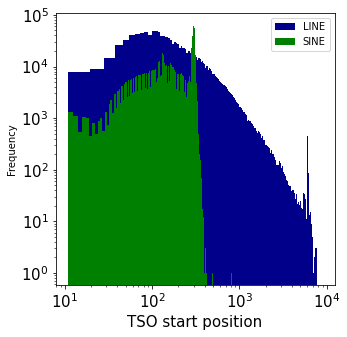

In [122]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(L_length, bins=1000, color='darkblue', label='LINE')
plt.hist(S_length, bins=500, color='green', label='SINE')

plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=10)
plt.legend(prop={'size': 10})
plt.xscale('log')
plt.yscale('log')
plt.savefig(s_fig + '/TE_lengths.svg', transparent=True)
plt.show()

In [ ]:
# Filter by insertion size
filt_prac1 = prac1[index]
filt_prac1

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
455,chr1,hg38_rmsk,exon,100199602,100206088,22308,+,.,L1PA7,L1PA7_dup342,L1,LINE
1260,chr1,hg38_rmsk,exon,100598238,100604384,25226,-,.,L1PA5,L1PA5_dup292,L1,LINE
1328,chr1,hg38_rmsk,exon,100632238,100638390,25354,-,.,L1PA3,L1PA3_dup292,L1,LINE
1368,chr1,hg38_rmsk,exon,100662981,100669120,25118,-,.,L1PA4,L1PA4,L1,LINE
1385,chr1,hg38_rmsk,exon,100676926,100682490,26591,-,.,L1PA3,L1PA3_dup293,L1,LINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4692835,chrY,hg38_rmsk,exon,9280856,9288557,20069,-,.,HERVE-int,HERVE-int_dup168,ERV1,LTR
4693438,chrY,hg38_rmsk,exon,9941130,9947151,28575,+,.,L1HS,L1HS_dup1116,L1,LINE
4693455,chrY,hg38_rmsk,exon,9961614,9967750,26510,-,.,L1PA3,L1PA3_dup7210,L1,LINE
4693468,chrY,hg38_rmsk,exon,9973837,9980574,38950,+,.,HERVK22-int,HERVK22-int_dup243,ERVK,LTR


In [ ]:
#Convert End values to Start + shift
nbase_shift = 20
filt_prac1['End']=filt_prac1['Start'] + nbase_shift
filt_prac1

/tmp/ipykernel_2369450/3127570340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_prac1['End']=filt_prac1['Start'] + nbase_shift


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
455,chr1,hg38_rmsk,exon,100199602,100199622,22308,+,.,L1PA7,L1PA7_dup342,L1,LINE
1260,chr1,hg38_rmsk,exon,100598238,100598258,25226,-,.,L1PA5,L1PA5_dup292,L1,LINE
1328,chr1,hg38_rmsk,exon,100632238,100632258,25354,-,.,L1PA3,L1PA3_dup292,L1,LINE
1368,chr1,hg38_rmsk,exon,100662981,100663001,25118,-,.,L1PA4,L1PA4,L1,LINE
1385,chr1,hg38_rmsk,exon,100676926,100676946,26591,-,.,L1PA3,L1PA3_dup293,L1,LINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4692835,chrY,hg38_rmsk,exon,9280856,9280876,20069,-,.,HERVE-int,HERVE-int_dup168,ERV1,LTR
4693438,chrY,hg38_rmsk,exon,9941130,9941150,28575,+,.,L1HS,L1HS_dup1116,L1,LINE
4693455,chrY,hg38_rmsk,exon,9961614,9961634,26510,-,.,L1PA3,L1PA3_dup7210,L1,LINE
4693468,chrY,hg38_rmsk,exon,9973837,9973857,38950,+,.,HERVK22-int,HERVK22-int_dup243,ERVK,LTR


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
455,chr1,hg38_rmsk,exon,100199602,0,22308,+,.,L1PA7,L1PA7_dup342,L1,LINE
1260,chr1,hg38_rmsk,exon,100598238,0,25226,-,.,L1PA5,L1PA5_dup292,L1,LINE
1328,chr1,hg38_rmsk,exon,100632238,0,25354,-,.,L1PA3,L1PA3_dup292,L1,LINE
1368,chr1,hg38_rmsk,exon,100662981,0,25118,-,.,L1PA4,L1PA4,L1,LINE
1385,chr1,hg38_rmsk,exon,100676926,0,26591,-,.,L1PA3,L1PA3_dup293,L1,LINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4692835,chrY,hg38_rmsk,exon,9280856,0,20069,-,.,HERVE-int,HERVE-int_dup168,ERV1,LTR
4693438,chrY,hg38_rmsk,exon,9941130,0,28575,+,.,L1HS,L1HS_dup1116,L1,LINE
4693455,chrY,hg38_rmsk,exon,9961614,0,26510,-,.,L1PA3,L1PA3_dup7210,L1,LINE
4693468,chrY,hg38_rmsk,exon,9973837,0,38950,+,.,HERVK22-int,HERVK22-int_dup243,ERVK,LTR


# TE RNA over lifespan

In [190]:
#=======================================================================
def TE_sweep(tet_df, name): 
#=======================================================================
    """
    This function sums up TE counts over different TE elements.
    
    Inputs:
    tet_df (dataframe): dataframe of genes x counts, output from TE_transcripts
    str
    
    Returns:
    """
    

    sum_counts = sum(tet_df['counts'][tet_df['gene'].str.contains(name, case=False)])/sum(tet_df['counts'])*1000000

    return(sum_counts)


In [ ]:
def calculate_age(milli_div, subsitution_rate=2.2):
    p = milli_div / 1000  # The milliDiv column in the `rmsk.txt` file.
    p_part = (4 / 3) * p
    jc_dist = -0.75 * (log(1 - p_part))
    (jc_dist * 100) / (subsitution_rate * 2 * 100) * 1000
    return jc_dist


def read_rmsk(filename: str):
    # read first line to check if it is a valid rmsk file
    if filename.endswith(".gz"):
        with gzip.open(filename) as f:
            line = f.readline()
    else:
        with open(filename) as f:
            line = f.readline()

        assert (
            line
            == "   SW  perc perc perc  query      position in query           matching       repeat              position in  repeat\n"
        ), "Not a valid rmsk file"

    # setup converter functions
    strand_conv = lambda x: "-" if x == "C" else "+"
    coord_conv = lambda x: int(x.rstrip(")").lstrip("("))
    perc_conv = lambda x: float(x) * 10

    convs = {
        "milliDiv": perc_conv,
        "milliDel": perc_conv,
        "milliIns": perc_conv,
        "genoLeft": coord_conv,
        "strand": strand_conv,
        "repStart": coord_conv,
        "repLeft": coord_conv,
    }

    # read the rmsk file
    df = pd.read_csv(
        filename,
        skiprows=3,
        delim_whitespace=True,
        names=[
            "swScore",
            "milliDiv",
            "milliDel",
            "milliIns",
            "genoName",
            "genoStart",
            "genoEnd",
            "genoLeft",
            "strand",
            "repName",
            "repClassFamily",
            "repStart",
            "repEnd",
            "repLeft",
            "id",
        ],
        converters=convs,
    )

    # split repClassFamily into repClass and repFamily on /
    df[["repClass", "repFamily"]] = df["repClassFamily"].str.split("/", expand=True)
    df.drop("repClassFamily", axis=1, inplace=True)

    # calculate length of each repeat
    df["length"] = df.apply(
        lambda x: x["repEnd"] - x["repLeft"]
        if x["strand"] == "-"
        else x["repEnd"] - x["repStart"],
        axis=1,
    )

    # calculate age of each repeat
    df["age"] = df["milliDiv"].apply(calculate_age)

    return df

In [174]:
label_df = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/rmsk.hg38.other.tsv', sep='\t')
label_df

,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
0,0,1892,83,59,14,chr1,67108753,67109046,-181847376,+,L1P5,LINE,L1,5301,5607,-544,1
1,1,2582,27,0,23,chr1,8388315,8388618,-240567804,-,AluY,SINE,Alu,-15,296,1,1
2,1,4085,171,77,36,chr1,25165803,25166380,-223790042,+,L1MB5,LINE,L1,5567,6174,0,4
3,1,2285,91,0,13,chr1,33554185,33554483,-215401939,-,AluSc,SINE,Alu,-6,303,10,6
4,1,2451,64,3,26,chr1,41942894,41943205,-207013217,-,AluY,SINE,Alu,-7,304,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633659,585,270,146,0,20,chr22_KI270739v1_random,42471,42520,-31465,-,Tigger5b,DNA,TcMar-Tigger,-38,434,387,2
5633660,585,1296,147,2,0,chr22_KI270739v1_random,42530,48656,-25329,-,ALR/Alpha,Satellite,centr,-26,6133,1,2
5633661,585,3289,66,0,0,chr22_KI270739v1_random,48656,49096,-24889,-,L1PA3,LINE,L1,-997,5149,4710,2
5633662,585,6957,54,5,2,chr22_KI270739v1_random,49091,50070,-23915,+,L1PA3,LINE,L1,5171,6152,-3,2


In [175]:
clas = label_df['repClass'].unique()[:3]
LINE_family = label_df['repFamily'][label_df['repClass'] == 'LINE'].unique()
SINE_family = label_df['repFamily'][label_df['repClass'] == 'SINE'].unique()
LTR_family = label_df['repFamily'][label_df['repClass'] == 'LTR'].unique()

In [176]:
LINE_family

array(['L1', 'L2', 'CR1', 'RTE-X', 'RTE-BovB', 'Penelope', 'Dong-R4',
       'I-Jockey', 'L1-Tx1'], dtype=object)

### Coarse clusters


In [183]:
tet_path = '/cndd3/dburrows/DATA/te/rna/tet_counts.subset.no_TSO/'

# Map names onto age
AGE = np.asarray(male_GLU_df['AGEYEARS'])
ID = np.asarray(male_GLU_df['Sample ID'])
ID,AGE

(array(['6032', '6285', '1823', '5643', 'Hct16HECA028', '1277', '1241',
        '1848', '5326', '5744'], dtype=object),
 array([ 4, 11, 15, 17, 30, 35, 39, 58, 62, 77]))

In [ ]:
TE_sweep(tet_df, 'ENS')

34020331

In [187]:
sum(tet_df['counts'])

78495168

In [204]:
#Store counts and metadata in dataframe
cell_l = ['GLU', 'GABA']
id_l = ID
id_e, cell_e, L1_e, SI_e, LTR_e, gene_e = [], [],[],[], [],[]
#Loop through cell and ID
for c in cell_l:
    for i in id_l:
        id_e = np.append(id_e,i)
        cell_e = np.append(cell_e,c)
        tet_df = pd.read_csv(tet_path + '/' + str(i) + '-' + c + '.cntTable', sep='\t')
        tet_df = tet_df.rename(columns={'gene/TE': 'gene', tet_df.T.index[1]: 'counts'})
        L1_e = np.append(L1_e,TE_sweep(tet_df, 'LINE'))
        SI_e = np.append(SI_e,TE_sweep(tet_df, 'SINE'))
        LTR_e = np.append(LTR_e,TE_sweep(tet_df, 'LTR'))


te_c_df = pd.DataFrame({'Sample ID':id_e,'cell':cell_e, 
                        'age':np.hstack((AGE,AGE)), 
                        'LINE': L1_e/5500,
                        'SINE': SI_e/700,
                        'LTR': LTR_e/5000
                        })
te_c_df

,Sample ID,cell,age,LINE,SINE,LTR
0,6032,GLU,4,48.537252,237.387080,20.339020
1,6285,GLU,11,50.974602,223.679845,19.822385
2,1823,GLU,15,42.279020,232.474517,19.394677
3,5643,GLU,17,43.479688,241.586808,19.698349
4,Hct16HECA028,GLU,30,40.079871,183.059915,16.763767
5,1277,GLU,35,44.018359,248.747832,20.218376
6,1241,GLU,39,51.878558,227.395632,20.068401
7,1848,GLU,58,50.571149,254.793281,22.308164
8,5326,GLU,62,42.842800,220.927168,19.007614
9,5744,GLU,77,50.600298,215.455937,20.225153


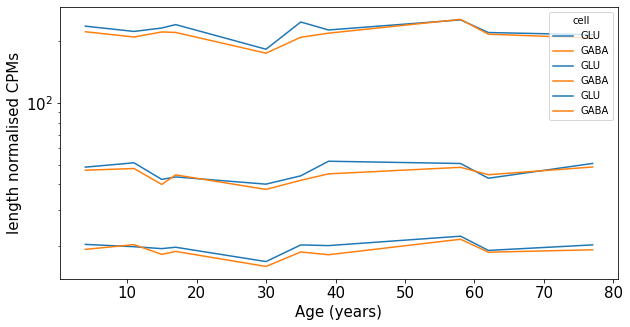

In [210]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=te_c_df, x="age", y="LINE", hue='cell')
sns.lineplot(data=te_c_df, x="age", y="SINE", hue='cell')
sns.lineplot(data=te_c_df, x="age", y="LTR", hue='cell')

plt.xlabel('Age (years)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.ylabel('length normalised CPMs', fontsize=15)
plt.savefig(s_fig + '/TE_coarse.svg', transparent=True)
plt.show()



<AxesSubplot:xlabel='age', ylabel='SINE'>

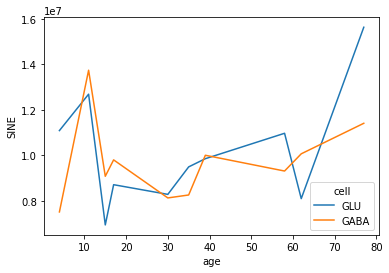

In [ ]:
sns.lineplot(data=te_c_df, x="age", y="SINE", hue="cell")

<AxesSubplot:xlabel='age', ylabel='LTR'>

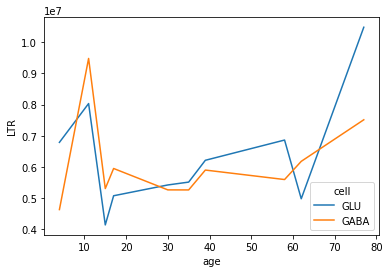

In [ ]:
import seaborn as sns
sns.lineplot(data=te_c_df, x="age", y="LTR", hue="cell")

<AxesSubplot:xlabel='age', ylabel='all genes'>

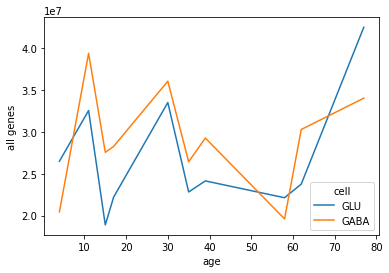

In [ ]:
import seaborn as sns
sns.lineplot(data=te_c_df, x="age", y="all genes", hue="cell")

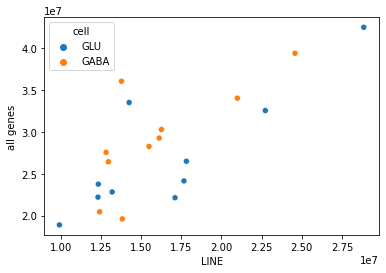

In [ ]:
sns.scatterplot(data=te_c_df, x="LINE", y="all genes", hue="cell")
plt.show()

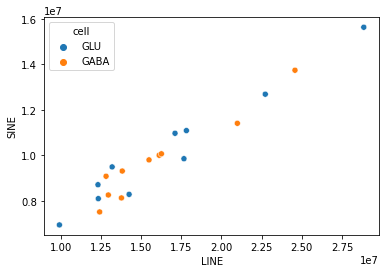

In [ ]:
sns.scatterplot(data=te_c_df, x="LINE", y="SINE", hue="cell")
plt.show()

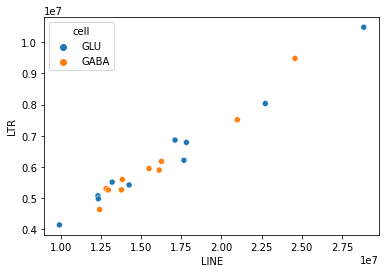

In [ ]:
sns.scatterplot(data=te_c_df, x="LINE", y="LTR", hue="cell")
plt.show()

### Granular cluster



In [213]:
label_df

,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
0,0,1892,83,59,14,chr1,67108753,67109046,-181847376,+,L1P5,LINE,L1,5301,5607,-544,1
1,1,2582,27,0,23,chr1,8388315,8388618,-240567804,-,AluY,SINE,Alu,-15,296,1,1
2,1,4085,171,77,36,chr1,25165803,25166380,-223790042,+,L1MB5,LINE,L1,5567,6174,0,4
3,1,2285,91,0,13,chr1,33554185,33554483,-215401939,-,AluSc,SINE,Alu,-6,303,10,6
4,1,2451,64,3,26,chr1,41942894,41943205,-207013217,-,AluY,SINE,Alu,-7,304,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633659,585,270,146,0,20,chr22_KI270739v1_random,42471,42520,-31465,-,Tigger5b,DNA,TcMar-Tigger,-38,434,387,2
5633660,585,1296,147,2,0,chr22_KI270739v1_random,42530,48656,-25329,-,ALR/Alpha,Satellite,centr,-26,6133,1,2
5633661,585,3289,66,0,0,chr22_KI270739v1_random,48656,49096,-24889,-,L1PA3,LINE,L1,-997,5149,4710,2
5633662,585,6957,54,5,2,chr22_KI270739v1_random,49091,50070,-23915,+,L1PA3,LINE,L1,5171,6152,-3,2


In [218]:
clas = label_df['repClass'].unique()[:3]
LINE_family = label_df['repFamily'][label_df['repClass'] == 'LINE'].unique()
SINE_family = label_df['repFamily'][label_df['repClass'] == 'SINE'].unique()
LTR_family = label_df['repFamily'][label_df['repClass'] == 'LTR'].unique()

In [219]:
LINE_family

array(['L1', 'L2', 'CR1', 'RTE-X', 'RTE-BovB', 'Penelope', 'Dong-R4',
       'I-Jockey', 'L1-Tx1'], dtype=object)

In [220]:
#LINE SUBFAMILIES
curr_input = LINE_family

#Store counts and metadata in dataframe
cell_l = ['GLU', 'GABA']
id_l = ID
id_e, cell_e, = [], []
empty_l = [[] for i in range(len(curr_input))]

#Loop through cell and ID
for c in cell_l:
    for i in id_l:
        id_e = np.append(id_e,i)
        cell_e = np.append(cell_e,c)
        tet_df = pd.read_csv(tet_path + '/' + str(i) + '-' + c + '.cntTable', sep='\t')
        tet_df = tet_df.rename(columns={'gene/TE': 'gene', tet_df.T.index[1]: 'counts'})
        for x in range(len(empty_l)):
            empty_l[x] = np.append(empty_l[x],TE_sweep(tet_df, curr_input[x]))

te_c_df = pd.DataFrame({'Sample ID':id_e,'cell':cell_e, 
                        'age':np.hstack((AGE,AGE))})

for x in range(len(empty_l)):
    te_c_df.insert(len(te_c_df.columns), curr_input[x], empty_l[x])
    
te_c_df

,Sample ID,cell,age,L1,L2,CR1,RTE-X,RTE-BovB,Penelope,Dong-R4,I-Jockey,L1-Tx1
0,6032,GLU,4,157225.862785,96580.602260,9893.941196,2246.279992,0.0,100.605637,89.340681,0.0,0.0
1,6285,GLU,11,166314.231086,101121.189984,9844.984021,2115.896432,0.0,101.327954,87.289579,0.0,0.0
2,1823,GLU,15,133673.243079,86462.770802,9320.964766,2130.242485,0.0,101.191321,79.191170,0.0,0.0
3,5643,GLU,17,138124.764948,88780.091926,9256.487864,2056.147718,0.0,92.783787,74.289131,0.0,0.0
4,Hct16HECA028,GLU,30,127067.449843,82900.665625,7955.286084,1729.939037,0.0,79.729884,64.903248,0.0,0.0
5,1277,GLU,35,141981.171152,87504.534928,9444.531703,2180.304223,0.0,96.061810,73.875364,0.0,0.0
6,1241,GLU,39,171590.321204,100317.264298,10118.241605,2299.659088,0.0,102.964266,86.314932,0.0,0.0
7,1848,GLU,58,164629.375329,99521.676316,10479.752770,2410.707032,0.0,112.077529,89.941567,0.0,0.0
8,5326,GLU,62,141589.650034,82070.661442,8954.384486,2068.317178,0.0,87.757202,74.737752,0.0,0.0
9,5744,GLU,77,164449.604279,101342.566736,9479.846760,2130.089134,0.0,93.516344,73.780971,0.0,0.0


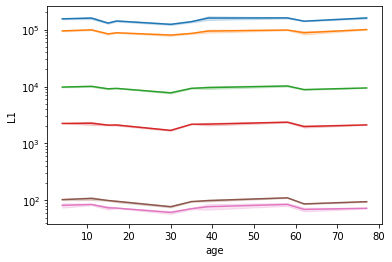

In [221]:
import seaborn as sns
for name in curr_input:
    sns.lineplot(data=te_c_df, x="age", y=name)
plt.yscale('log')
plt.show()


In [ ]:
#SINE SUBFAMILIES
curr_input = SINE_family

#Store counts and metadata in dataframe
cell_l = ['GLU', 'GABA']
id_l = ID
id_e, cell_e, = [], []
empty_l = [[] for i in range(len(curr_input))]

#Loop through cell and ID
for c in cell_l:
    for i in id_l:
        id_e = np.append(id_e,i)
        cell_e = np.append(cell_e,c)
        tet_df = pd.read_csv(tet_path + '/' + str(i) + '-' + c + '.cntTable', sep='\t')
        tet_df = tet_df.rename(columns={'gene/TE': 'gene', tet_df.T.index[1]: 'counts'})
        for x in range(len(empty_l)):
            empty_l[x] = np.append(empty_l[x],TE_sweep(tet_df, curr_input[x]))

te_c_df = pd.DataFrame({'Sample ID':id_e,'cell':cell_e, 
                        'age':np.hstack((AGE,AGE))})

for x in range(len(empty_l)):
    te_c_df.insert(len(te_c_df.columns), curr_input[x], empty_l[x])
    
te_c_df

,Sample ID,cell,age,Alu,MIR,tRNA,tRNA-Deu,5S-Deu-L2,tRNA-RTE
0,6032,GLU,4,6853646.0,4219264.0,0.0,0.0,19843.0,0.0
1,6285,GLU,11,7667374.0,5001593.0,0.0,0.0,23475.0,0.0
2,1823,GLU,15,4371011.0,2561557.0,0.0,0.0,12999.0,0.0
3,5643,GLU,17,5550500.0,3149487.0,0.0,0.0,13925.0,0.0
4,Hct16HECA028,GLU,30,5006052.0,3266891.0,0.0,0.0,15295.0,0.0
5,1277,GLU,35,6136156.0,3344377.0,0.0,0.0,15674.0,0.0
6,1241,GLU,39,5910035.0,3928893.0,0.0,0.0,17898.0,0.0
7,1848,GLU,58,6733828.0,4219895.0,0.0,0.0,20109.0,0.0
8,5326,GLU,62,5134850.0,2952146.0,0.0,0.0,13904.0,0.0
9,5744,GLU,77,9431161.0,6176095.0,0.0,0.0,28263.0,0.0


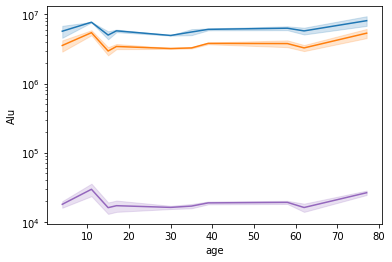

In [ ]:
import seaborn as sns
for name in curr_input:
    sns.lineplot(data=te_c_df, x="age", y=name)
plt.yscale('log')
plt.show()


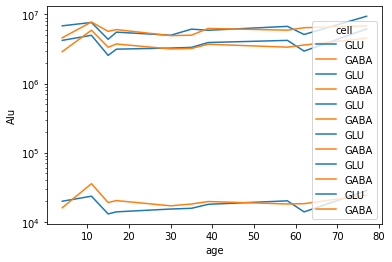

In [ ]:
import seaborn as sns
for name in curr_input:
    sns.lineplot(data=te_c_df, x="age", y=name, hue='cell')
plt.yscale('log')
plt.show()


In [ ]:
#SINE SUBFAMILIES
curr_input = LTR_family

#Store counts and metadata in dataframe
cell_l = ['GLU', 'GABA']
id_l = ID
id_e, cell_e, = [], []
empty_l = [[] for i in range(len(curr_input))]

#Loop through cell and ID
for c in cell_l:
    for i in id_l:
        id_e = np.append(id_e,i)
        cell_e = np.append(cell_e,c)
        tet_df = pd.read_csv(tet_path + '/' + str(i) + '-' + c + '.cntTable', sep='\t')
        tet_df = tet_df.rename(columns={'gene/TE': 'gene', tet_df.T.index[1]: 'counts'})
        for x in range(len(empty_l)):
            empty_l[x] = np.append(empty_l[x],TE_sweep(tet_df, curr_input[x]))

te_c_df = pd.DataFrame({'Sample ID':id_e,'cell':cell_e, 
                        'age':np.hstack((AGE,AGE))})

for x in range(len(empty_l)):
    te_c_df.insert(len(te_c_df.columns), curr_input[x], empty_l[x])
    
te_c_df

,Sample ID,cell,age,ERVL-MaLR,ERV1,ERVK,ERVL,Gypsy,Gypsy?,ERVL?,LTR,ERV1?
0,6032,GLU,4,3129465.0,1804050.0,254430.0,4546743.0,126959.0,126959.0,6595345.0,6788728.0,6595345.0
1,6285,GLU,11,3768196.0,2121676.0,256017.0,5434403.0,155528.0,155528.0,7800769.0,8034361.0,7800769.0
2,1823,GLU,15,1910484.0,1080710.0,153749.0,2789865.0,79125.0,79125.0,4018567.0,4138972.0,4018567.0
3,5643,GLU,17,2347661.0,1334856.0,188800.0,3416185.0,93880.0,93880.0,4932386.0,5075122.0,4932386.0
4,Hct16HECA028,GLU,30,2528507.0,1433974.0,203035.0,3638276.0,102595.0,102595.0,5268108.0,5421477.0,5268108.0
5,1277,GLU,35,2539022.0,1463712.0,204126.0,3696740.0,102062.0,102062.0,5357176.0,5513329.0,5357176.0
6,1241,GLU,39,2860166.0,1689228.0,212917.0,4137152.0,119790.0,119790.0,6031021.0,6213618.0,6031021.0
7,1848,GLU,58,3199833.0,1805221.0,235742.0,4632823.0,130789.0,130789.0,6664079.0,6862977.0,6664079.0
8,5326,GLU,62,2284189.0,1310327.0,210142.0,3324579.0,91314.0,91314.0,4837874.0,4978395.0,4837874.0
9,5744,GLU,77,4807077.0,2855265.0,360610.0,6987913.0,197109.0,197109.0,10188071.0,10483882.0,10188071.0


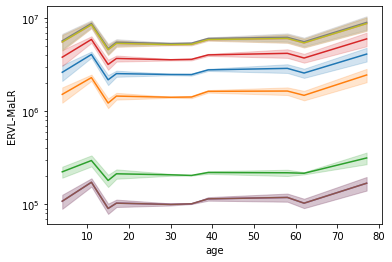

In [ ]:
import seaborn as sns
for name in curr_input:
    sns.lineplot(data=te_c_df, x="age", y=name)
plt.yscale('log')
plt.show()